# Métricas de distancias

In [1]:
# Carga bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from sklearn import datasets

%matplotlib inline

In [2]:
# Genera N datos
N = 80

In [3]:
# Blobs isotrópicos
Xblobs, Lblobs = datasets.make_blobs(n_samples=N, random_state=8)
# Blobs aniisotrópicos
X, Lblobsa = datasets.make_blobs(n_samples=N, random_state=170)
Xblobsa = np.dot(X, [[0.6, -0.6], [-0.4, 0.8]])
# Blobs de distinta varianza
Xblobsv, Lblobsv = datasets.make_blobs(n_samples=N, cluster_std=[1.0, 2.5, 0.5],
                             random_state=170)
trash = """
plt.figure(figsize=(15,5))
for X, l, i in zip((Xblobs,Xblobsa,Xblobsv),(Lblobs,Lblobsa,Lblobsv),range(1,4)):
  plt.subplot(1,3,i)
  plt.scatter(X[l==0, 0], X[l==0, 1], s=20, color='red');
  plt.scatter(X[l==1, 0], X[l==1, 1], s=20, color='blue');
  plt.scatter(X[l==2, 0], X[l==2, 1], s=20, color='green');
"""

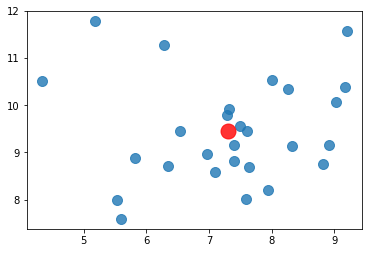

In [4]:
X   = Xblobs[Lblobs==0]
X_m = X.mean(axis=0)

plt.plot(X[:,0],X[:,1],'o' ,markersize=10,alpha=.8)
plt.plot(X_m[0],X_m[1],'or',markersize=15,alpha=.8)

In [5]:
k = 0
d = np.dot( X[k]-X_m, X[k]-X_m )
d = np.sqrt(d)
d

1.6408860559281804

In [6]:
D = np.dot( X-X_m, (X-X_m).T )
D = np.diag(D)
D = np.sqrt(D)
D

array([1.64088606, 2.30822493, 1.28973688, 0.59543805, 0.31232164,
       1.46739039, 0.63650862, 0.46506108, 1.40657415, 0.31316267,
       2.09254115, 0.82786538, 0.90216212, 3.14720036, 0.22232766,
       2.52394799, 1.58271465, 1.8283691 , 2.84384283, 1.66701191,
       2.08529582, 0.33809825, 1.21355226, 0.76505221, 3.15043003,
       1.07650918, 1.31240467])

In [7]:
x  = np.array( [ [ 1,2],[2, 4] ] )
y  = np.array( [ [0,0],[0,-2],[-1,-1],[-1,0],[2,-4] ] )
print(x);print(y)
print(x.shape);print(y.shape)

[[1 2]
 [2 4]]
[[ 0  0]
 [ 0 -2]
 [-1 -1]
 [-1  0]
 [ 2 -4]]
(2, 2)
(5, 2)


In [8]:
print( x[:,:,np.newaxis].shape )
print( y[np.newaxis    ].shape )

(2, 2, 1)
(1, 5, 2)


In [9]:
D = x[:,:,np.newaxis] - np.transpose( y[np.newaxis],(0,2,1) )
D = np.transpose(D,(0,2,1))
print(D);print(D.shape)

[[[ 1  2]
  [ 1  4]
  [ 2  3]
  [ 2  2]
  [-1  6]]

 [[ 2  4]
  [ 2  6]
  [ 3  5]
  [ 3  4]
  [ 0  8]]]
(2, 5, 2)


In [10]:
D =np.square(D).sum(axis=-1)
print(D);print(D.shape)

[[ 5 17 13  8 37]
 [20 40 34 25 64]]
(2, 5)


In [11]:
D = y[:,:,np.newaxis] - np.transpose( y[np.newaxis],(0,2,1) )
D = np.transpose(D,(0,2,1))
print(D);print(D.shape)

[[[ 0  0]
  [ 0  2]
  [ 1  1]
  [ 1  0]
  [-2  4]]

 [[ 0 -2]
  [ 0  0]
  [ 1 -1]
  [ 1 -2]
  [-2  2]]

 [[-1 -1]
  [-1  1]
  [ 0  0]
  [ 0 -1]
  [-3  3]]

 [[-1  0]
  [-1  2]
  [ 0  1]
  [ 0  0]
  [-3  4]]

 [[ 2 -4]
  [ 2 -2]
  [ 3 -3]
  [ 3 -4]
  [ 0  0]]]
(5, 5, 2)


In [12]:
D = np.square(D).sum(axis=-1)
print(D);print(D.shape)

[[ 0  4  2  1 20]
 [ 4  0  2  5  8]
 [ 2  2  0  1 18]
 [ 1  5  1  0 25]
 [20  8 18 25  0]]
(5, 5)


In [13]:
iD = np.argsort(D,axis=1)
print(iD)

[[0 3 2 1 4]
 [1 2 0 3 4]
 [2 3 0 1 4]
 [3 0 2 1 4]
 [4 1 2 0 3]]


In [14]:
for i,j in enumerate( iD[:,1] ):
    print( "%d, %d, %s, %s"%(i,j,y[i],y[j]) )

0, 3, [0 0], [-1  0]
1, 2, [ 0 -2], [-1 -1]
2, 3, [-1 -1], [-1  0]
3, 0, [-1  0], [0 0]
4, 1, [ 2 -4], [ 0 -2]


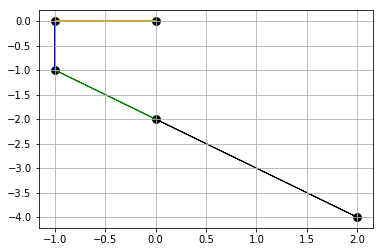

In [15]:
colors = ['r','g','b','y','k','orange']
plt.scatter(y[:,0], y[:,1], color='black',s=60)
plt.grid(True)
for i,(j,c) in enumerate( zip(iD[:,1], colors )  ):
    plt.arrow(y[i,0],y[i,1],y[j,0]-y[i,0],y[j,1]-y[i,1],color=c)

In [60]:
D  = X[:,:,np.newaxis] - np.transpose( X[np.newaxis],(0,2,1) )
D  = np.transpose(D,(0,2,1))
D  = np.sqrt( np.square(D).sum(axis=-1) )
iD = np.argsort(D,axis=1)

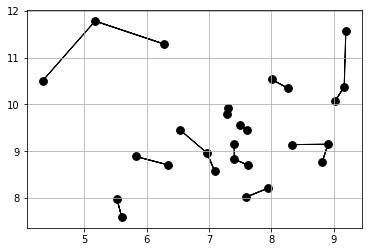

In [17]:
plt.scatter(X[:,0], X[:,1], color='black',s=60)
plt.grid(True)
for i,j in enumerate( iD[:,1]  ):
    plt.arrow(X[i,0],X[i,1],X[j,0]-X[i,0],X[j,1]-X[i,1])

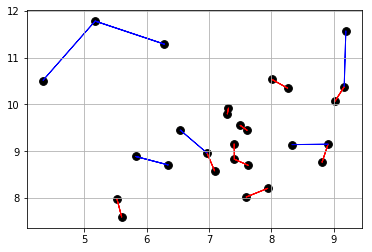

In [18]:
plt.scatter(X[:,0], X[:,1], color='black',s=60)
plt.grid(True)
for i,j in enumerate( iD[:,1] ):
    if D[i,j]<.5:
        plt.arrow(X[i,0],X[i,1],X[j,0]-X[i,0],X[j,1]-X[i,1],color='r')
    else:
        plt.arrow(X[i,0],X[i,1],X[j,0]-X[i,0],X[j,1]-X[i,1],color='b')

In [19]:
print(x)
print(y)

[[1 2]
 [2 4]]
[[ 0  0]
 [ 0 -2]
 [-1 -1]
 [-1  0]
 [ 2 -4]]


In [46]:
D  = y[:,:,np.newaxis] - np.transpose( y[np.newaxis],(0,2,1) )
D  = np.transpose(D,(0,2,1))
print(D);print(D.shape)

[[[ 0  0]
  [ 0  2]
  [ 1  1]
  [ 1  0]
  [-2  4]]

 [[ 0 -2]
  [ 0  0]
  [ 1 -1]
  [ 1 -2]
  [-2  2]]

 [[-1 -1]
  [-1  1]
  [ 0  0]
  [ 0 -1]
  [-3  3]]

 [[-1  0]
  [-1  2]
  [ 0  1]
  [ 0  0]
  [-3  4]]

 [[ 2 -4]
  [ 2 -2]
  [ 3 -3]
  [ 3 -4]
  [ 0  0]]]
(5, 5, 2)


In [47]:
i = 3
d = D[i]
C = np.linalg.inv( np.cov( d.T ) )
C

array([[2.46153846, 1.53846154],
       [1.53846154, 1.31868132]])

In [48]:
d = np.dot(d,C.T)
print(d)
print(d.shape)

[[-2.46153846 -1.53846154]
 [ 0.61538462  1.0989011 ]
 [ 1.53846154  1.31868132]
 [ 0.          0.        ]
 [-1.23076923  0.65934066]]
(5, 2)


In [49]:
d = np.dot( d,d.T )
print(d)

[[ 8.4260355  -3.20540997 -5.81572274  0.          2.01521555]
 [-3.20540997  1.58628185  2.39584591  0.         -0.03284627]
 [-5.81572274  2.39584591  4.10578433  0.         -1.02403091]
 [ 0.          0.          0.          0.          0.        ]
 [ 2.01521555 -0.03284627 -1.02403091  0.          1.949523  ]]


In [50]:
iD = np.argsort( np.abs(np.diag(d)) )
print(d); print(iD[1])

[[ 8.4260355  -3.20540997 -5.81572274  0.          2.01521555]
 [-3.20540997  1.58628185  2.39584591  0.         -0.03284627]
 [-5.81572274  2.39584591  4.10578433  0.         -1.02403091]
 [ 0.          0.          0.          0.          0.        ]
 [ 2.01521555 -0.03284627 -1.02403091  0.          1.949523  ]]
1


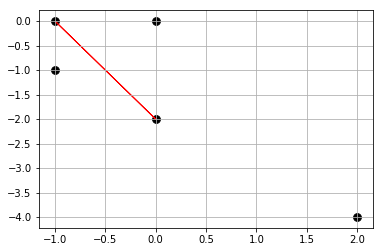

In [51]:
plt.scatter(y[:,0], y[:,1], color='black',s=60)
j=iD[1]
plt.arrow(y[i,0],y[i,1],y[j,0]-y[i,0],y[j,1]-y[i,1],color='r')
plt.grid(True)

In [56]:
sort = []
for i,d in enumerate(D):
    C  = np.linalg.inv( np.cov(d.T) )
    dp = np.dot(d ,C.T)
    dp = np.dot(dp,dp.T )
    dp = np.diag(dp)
    
    sort.append( np.argsort(dp)[1] )
    print(dp)
    print("")

print(sort)

[ 0.         16.4231373  24.16326531  8.4260355   6.3451274 ]

[16.4231373   0.          0.90037435  1.58628185  3.6014974 ]

[24.16326531  0.90037435  0.          4.10578433  8.10336916]

[8.4260355  1.58628185 4.10578433 0.         1.949523  ]

[6.3451274  3.6014974  8.10336916 1.949523   0.        ]

[4, 2, 1, 1, 3]


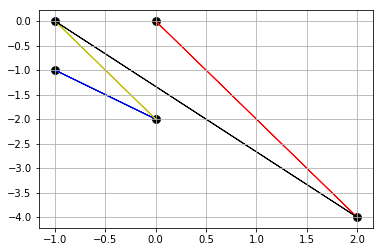

In [57]:
colors = ['r','g','b','y','k','orange']
plt.scatter(y[:,0], y[:,1], color='black',s=60)
plt.grid(True)
for i,(j,c) in enumerate( zip(sort,colors) ):
    plt.arrow(y[i,0],y[i,1],y[j,0]-y[i,0],y[j,1]-y[i,1],color=c)


In [58]:
D  = X[:,:,np.newaxis] - np.transpose( X[np.newaxis],(0,2,1) )
D  = np.transpose(D,(0,2,1))

sort = []
for i,d in enumerate(D):
    C  = np.linalg.inv( np.cov(d.T) )
    dp = np.dot(d ,C.T)
    dp = np.dot(dp,dp.T )
    dp = np.diag(dp)
    
    sort.append( np.argsort(dp)[1] )
    #print(dp)
    #print("")

print( len(sort) )

166


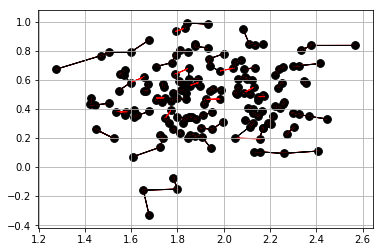

In [61]:
plt.scatter(X[:,0], X[:,1], color='black',s=60)
plt.grid(True)
for i,(j,k) in enumerate( zip(sort,iD[:,1]) ):
    plt.arrow(X[i,0],X[i,1],X[j,0]-X[i,0],X[j,1]-X[i,1],color='r')
    plt.arrow(X[i,0],X[i,1],X[k,0]-X[i,0],X[k,1]-X[i,1],color='k')

In [ ]:
D.shape

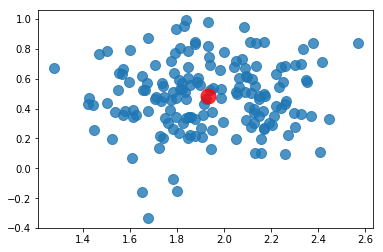

In [62]:
N                = 500
Xblobsv, Lblobsv = datasets.make_blobs(n_samples=N, cluster_std=[0.25, 1.2, 0.25],
                             random_state=170)

X   = Xblobsv[Lblobsv==2]
X_m = X.mean(axis=0)

plt.plot(X[:,0],X[:,1],'o' ,markersize=10,alpha=.8)
plt.plot(X_m[0],X_m[1],'or',markersize=15,alpha=.8)

In [63]:
D  = X[:,:,np.newaxis] - np.transpose( X[np.newaxis],(0,2,1) )
D  = np.transpose(D,(0,2,1))

sort = []
for i,d in enumerate(D):
    C  = np.linalg.inv( np.cov(d.T) )
    dp = np.dot(d ,C.T)
    dp = np.dot(dp,dp.T )
    dp = np.diag(dp)
    
    sort.append( np.argsort(dp)[1] )
    #print(dp)
    #print("")

print( len(sort) )

166


In [64]:
D  = X[:,:,np.newaxis] - np.transpose( X[np.newaxis],(0,2,1) )
D  = np.transpose(D,(0,2,1))
D  = np.sqrt( np.square(D).sum(axis=-1) )
iD = np.argsort(D,axis=1)

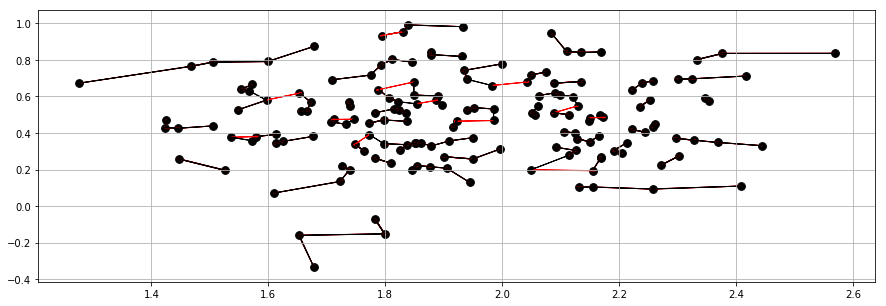

In [65]:
plt.figure(figsize=(15,5))
plt.scatter(X[:,0], X[:,1], color='black',s=60)
plt.grid(True)
for i,(j,k) in enumerate( zip(sort,iD[:,1]) ):
    plt.arrow(X[i,0],X[i,1],X[j,0]-X[i,0],X[j,1]-X[i,1],color='r')
    plt.arrow(X[i,0],X[i,1],X[k,0]-X[i,0],X[k,1]-X[i,1],color='k')


In [74]:
D  = X[:,:,np.newaxis] - np.transpose( X[np.newaxis],(0,2,1) )
D  = np.transpose(D,(0,2,1))

sort = []
for i,d in enumerate(D):
    C  = np.linalg.inv( np.cov(d.T) )
    dp = np.dot(d ,C.T)
    dp = np.dot(dp,dp.T )
    dp = np.diag(dp)
    
    sort.append( np.argsort(dp)[1] )
    #print(dp)
    #print("")

print( len(sort) )

166


In [89]:
C  = np.linalg.inv( np.cov(d.T) )
dp = np.dot(d ,C.T)
dp = np.dot(dp,dp.T )
dp = np.diag(dp)

print( np.einsum('ij,jk,ik->i',d,C,d)[:4] )
print( dp[:4])


[1.5261307  1.91497924 5.3370444  0.87801392]
[28.23367825 29.39663945 99.50372613 15.51529475]


In [8]:
l, E = np.linalg.eig(m)
print(l)
print(E)

[1.38196601 3.61803399]
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [9]:
n = 0
print( np.dot( m,E[:,n] ) )
print( l[n]*     E[:,n] )

[-1.1755705   0.72654253]
[-1.1755705   0.72654253]


In [10]:
n = 1
print( np.dot( m,E[:,n] ) )
print( l[n]*     E[:,n] )

[-1.90211303 -3.07768354]
[-1.90211303 -3.07768354]


In [11]:
l,E = np.linalg.eig( np.cov(X.T) )
print(l)
print(E)

[1.12589631 0.9650264 ]
[[ 0.96096542 -0.27666852]
 [ 0.27666852  0.96096542]]
